In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sqlalchemy import create_engine
# MySQL connection credentials
username = "root"
password = "root123"
host = "localhost"
port = 3306
database = "hr(attrition)"  # your database name
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")
df = pd.read_sql("SELECT * FROM hr_main", con=engine)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Female,2,Sales Executive,4,...,1,11,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,3,Male,2,Research Scientist,2,...,0,23,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,4,Male,1,Laboratory Technician,3,...,1,15,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Female,1,Research Scientist,3,...,1,11,3,8,3,3,8,7,3,0
4,32,0,Travel_Frequently,Research & Development,2,4,Male,1,Laboratory Technician,4,...,0,13,3,8,2,2,7,7,3,6


# Target Variable Distribution

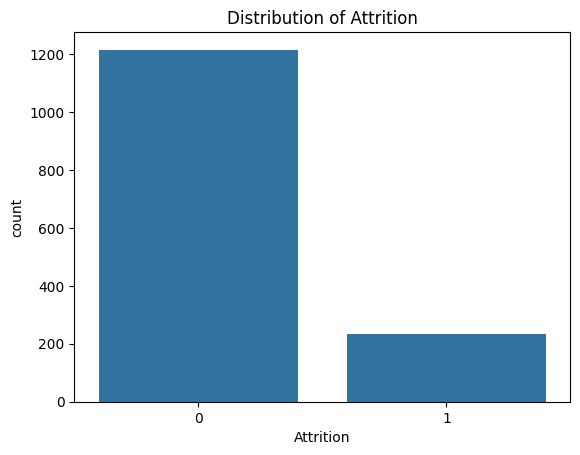

In [17]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

In [18]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.839088
1    0.160912
Name: proportion, dtype: float64

# Univariate Analysis

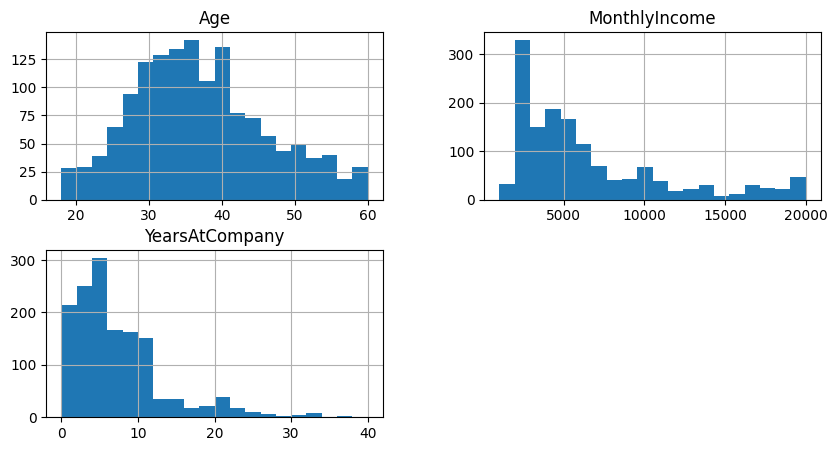

In [19]:
num_cols = ['Age','MonthlyIncome','YearsAtCompany']
df[num_cols].hist(bins=20, figsize=(10,5))
plt.show()


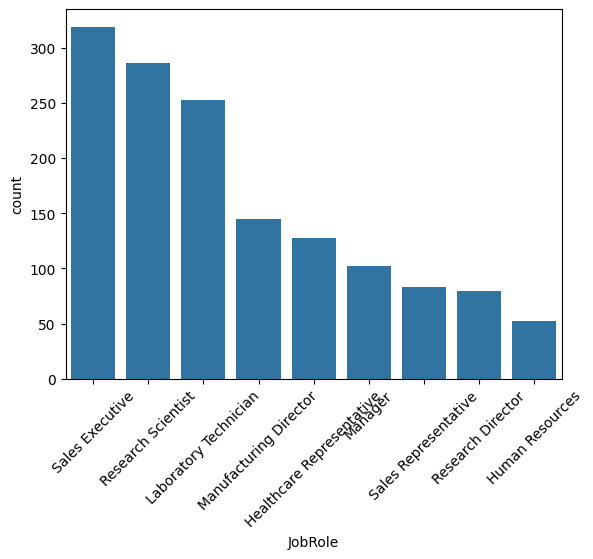

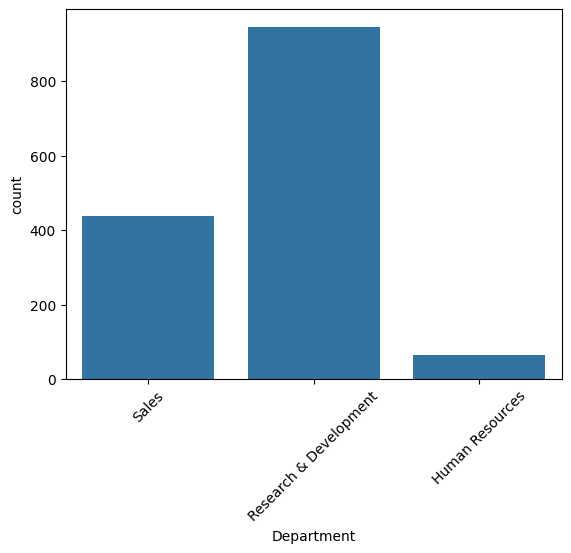

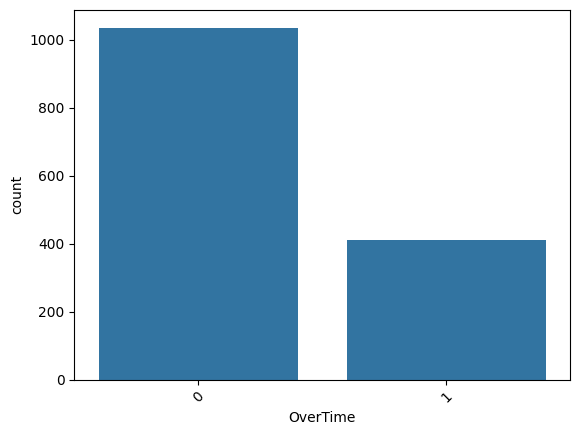

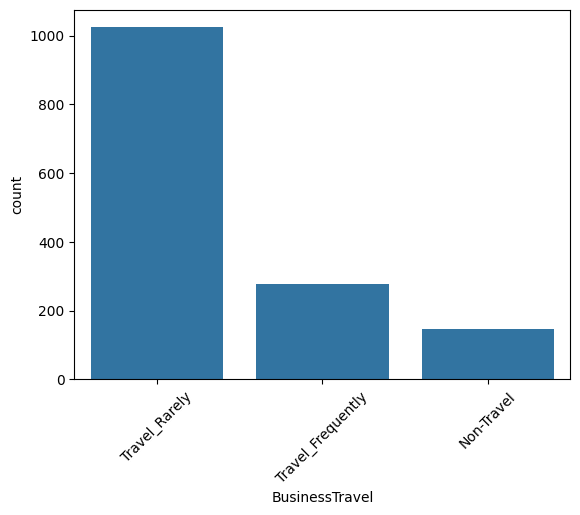

In [20]:
cat_cols = ['JobRole','Department','OverTime','BusinessTravel']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()


# Bivariate Analysis(Feature vs Target)

# OverTime vs Attrition

<Axes: xlabel='OverTime', ylabel='count'>

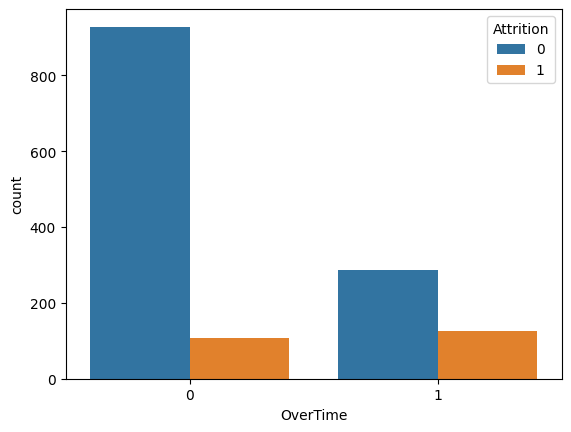

In [21]:
sns.countplot(x='OverTime', hue='Attrition', data=df)


# MonthlyIncome vs Attrition

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

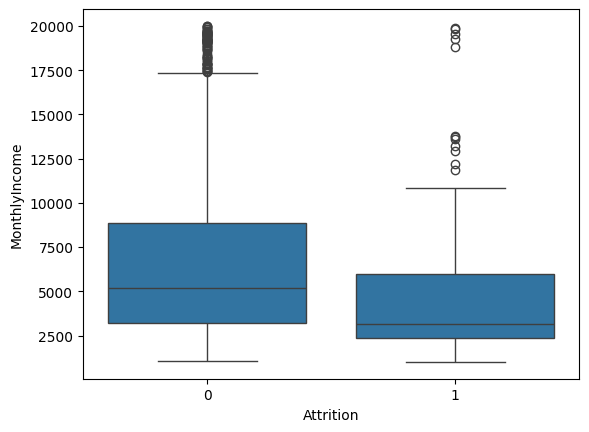

In [22]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)


# WorkLifeBalance vs Attrition

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

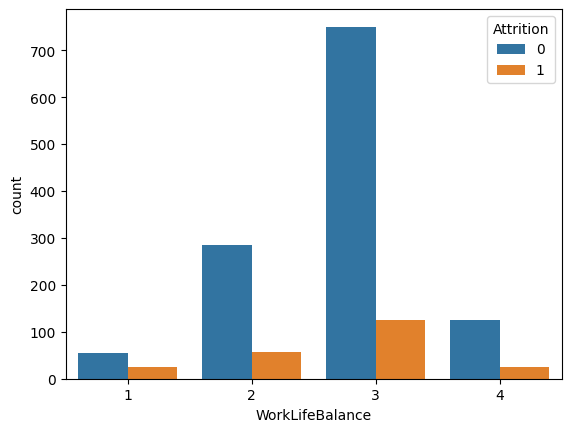

In [23]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)


# JobRole vs Attrition

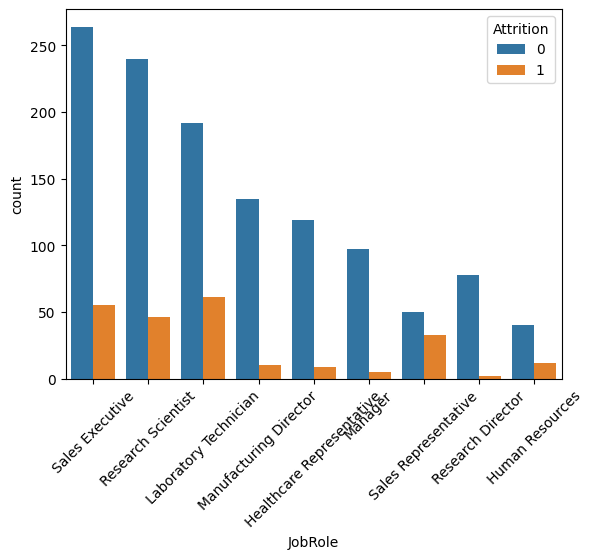

In [24]:
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis

In [27]:
df.shape

(1448, 22)

In [28]:
df.dtypes


Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
EnvironmentSatisfaction      int64
Gender                      object
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object